# Trabalho Final - Algebra Linear

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

## Inicialmente, importando a base de dados e fazendo pequenas análises.

In [26]:
data = pd.read_csv('../trabalho_final/data.csv')
data.sample(5)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
36870,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,8.0
205870,1.0,1.0,1.0,1.0,32.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,5.0,20.0,30.0,1.0,1.0,7.0,5.0,2.0
131874,0.0,0.0,0.0,1.0,37.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,4.0,14.0,7.0,0.0,0.0,1.0,5.0,3.0
135243,1.0,0.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,6.0
138787,1.0,1.0,1.0,1.0,58.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,4.0,2.0,2.0,0.0,1.0,6.0,4.0,6.0


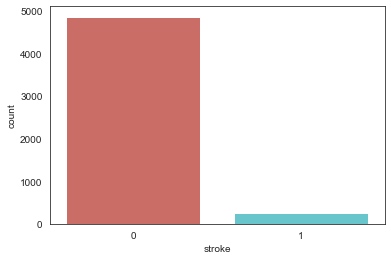

In [18]:
sns.countplot(x='HeartDiseaseorAttack',data=data,palette='hls')
plt.show()

## Criando as funções para a Regressão Logística

### Função sigmóide (logit)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Função de custo

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

### Gradiente descendente

In [6]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

### Função de predição
    Maior que 0.5 é arredondada p/ 1, menor p/ 0.

In [7]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

## Transformando os dados
    pd.core.series.Series em np.ndarray

In [29]:
y = data['HeartDiseaseorAttack'].to_numpy(dtype ='int')
y = y[:,np.newaxis] #transforma y em um vetor coluna
X_1 = data['Age'].to_numpy(dtype ='float')
X_1 = np.vstack((X_1))
X_2 = data['BMI'].to_numpy(dtype ='float')
X_2 = np.vstack((X_2))
X = np.hstack((X_1,X_2))

C:\Users\Conda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'BMI')

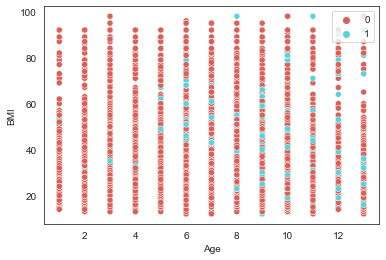

In [32]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1),palette='hls');
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.ylabel("BMI")

NameError: name 'a' is not defined